In [1]:
%matplotlib widget
import cartopy.crs as ccrs
from spectraclass.data.base import DataManager
from spectraclass.data.spatial.tile.manager import TileManager, tm
from spectraclass.data.spatial.tile.tile import Block, Tile
import os, conda, numbers, time
from typing import List, Union, Tuple, Optional, Dict, Callable
import numpy as np
import xarray as xa
from matplotlib.image import AxesImage
from cartopy.mpl.geoaxes import GeoAxes
from spectraclass.xext.xgeo import XGeo
import matplotlib.pyplot as plt
import rioxarray as rio
t0 = time.time()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
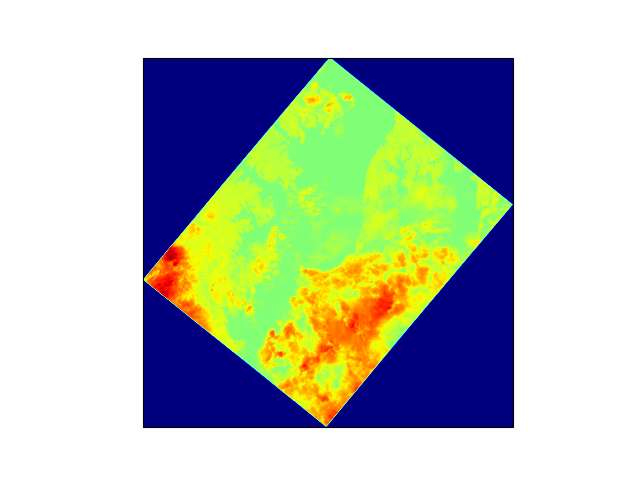

In [2]:
iband = 200
origin = "upper"
cmap="jet"
epsg = 4326
reproject_using = "cartopy"

gcrs = ccrs.PlateCarree()
wcrs = ccrs.epsg(3857)
SpectralDataFile = "/Users/tpmaxwel/Development/Data/desis/DESIS-HSI-L1C-DT0468853252_003-20200628T153803-V0210-SPECTRAL_IMAGE.tif"
utm_data_array: xa.DataArray = rio.open_rasterio( SpectralDataFile, chunks=True ) # TileManager.read_data_layer( SpectralDataFile, origin, nodata_fill=0 )
utm_band_array = utm_data_array[iband].squeeze()

band_array: np.ndarray = utm_band_array.data
band_extent: List[int] = utm_data_array.xgeo.bounds()

ax0: GeoAxes = plt.axes( projection=wcrs )
img0: AxesImage = ax0.imshow( band_array, transform=wcrs, origin=origin, cmap=cmap, extent=band_extent )
ax0.set_extent( band_extent, wcrs )
plt.show()


In [ ]:
dm: DataManager = DataManager.initialize( "demo2", 'desis' )  #  ("demo4", 'swift' ) ( "demo2", 'desis' )
dm.loadCurrentProject("main")
band_index = 100
gcrs = ccrs.PlateCarree()

block: Block = tm().getBlock()
block.data[band_index].plot()

